Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aastha Gupta"
COLLABORATORS = ""

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = ""
COLLABORATORS = ""

---

1. Getting the Data

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load Dataset
file_path = "nj_camden_2020_04_01.csv" 
df = pd.read_csv(file_path)

df.head()

/tmp/ipykernel_3215726/2605890493.py:3: DtypeWarning: Columns (9,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,unit,...,citation_issued,warning_issued,outcome,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,raw_race,raw_ethnicity
0,1,2013-05-01,02:09:00,N 7TH ST & YORK ST CAMDEN NEW JERSEY 08102,39.104028,-84.512616,19.0,hispanic,male,NaN,...,False,False,NaN,"BLUE,DARK",MITSUBISHI,LANCER,NaN,2002.0,WHITE,Hispanic Or Latino
1,2,2013-05-01,03:51:00,N FRONT ST & YORK ST CAMDEN NEW JERSEY 08102,39.951751,-75.124895,23.0,white,male,NaN,...,True,False,citation,MAROON,HYUNDAI,SANTA FE,NJ,2004.0,WHITE,Not Hispanic Or Latino
2,3,2013-05-01,04:23:00,S 17TH ST & FEDERAL ST CAMDEN NEW JERSEY 08105,39.944575,-75.100156,34.0,black,female,NaN,...,False,False,NaN,BLACK,CHEVROLET,SUBURBAN,NJ,2008.0,BLACK,Not Hispanic Or Latino
3,4,2013-05-01,07:57:00,N 5TH ST & YORK ST CAMDEN NEW JERSEY 08102,39.953857,-75.118494,37.0,hispanic,male,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,WHITE,Hispanic Or Latino
4,5,2013-05-01,07:58:00,N 4TH ST & ERIE ST CAMDEN NEW JERSEY 08102,39.955115,-75.119466,27.0,white,male,NaN,...,True,False,citation,GRAY,HONDA,ACCORD,NJ,2000.0,WHITE,Not Hispanic Or Latino


In [5]:
df.info()
print("Number of Rows:", len(df))
print("Number of Columns:", len(df.columns))

print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195298 entries, 0 to 195297
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   raw_row_number              195298 non-null  object 
 1   date                        195100 non-null  object 
 2   time                        195101 non-null  object 
 3   location                    192747 non-null  object 
 4   lat                         191544 non-null  float64
 5   lng                         191544 non-null  float64
 6   subject_age                 193072 non-null  float64
 7   subject_race                193405 non-null  object 
 8   subject_sex                 195153 non-null  object 
 9   unit                        83446 non-null   object 
 10  type                        195298 non-null  object 
 11  disposition                 195287 non-null  object 
 12  arrest_made                 195287 non-null  object 
 13  citation_issue

Data Cleaning

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)
print(missing_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df["Percentage"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


In [7]:
# handle missing values by filling age with median age, drop rows where important columns are missing

df["subject_age"].fillna(df["subject_age"].median(), inplace=True)

df.dropna(subset=["subject_race", "arrest_made"], inplace=True)

print("Remaining missing values:")
print(df.isnull().sum())


Remaining missing values:
raw_row_number                     0
date                             194
time                             193
location                        2530
lat                             3727
lng                             3727
subject_age                        0
subject_race                       0
subject_sex                       15
unit                          110624
type                               0
disposition                        0
arrest_made                        0
citation_issued                    0
warning_issued                     0
outcome                       101828
vehicle_color                  54723
vehicle_make                   54463
vehicle_model                  56095
vehicle_registration_state     48421
vehicle_year                   56424
raw_race                         266
raw_ethnicity                   4990
dtype: int64


/tmp/ipykernel_3215726/1019759484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["subject_age"].fillna(df["subject_age"].median(), inplace=True)


In [8]:
# Create a new column `stopped_at_night` (true if stop occurred between 8 PM and 6 AM)
df["time"] = pd.to_datetime(df["time"], errors="coerce")
df["stopped_at_night"] = df["time"].apply(lambda x: 1 if x and (x.hour < 6 or x.hour >= 20) else 0)

df[["time", "stopped_at_night"]].head()


/tmp/ipykernel_3215726/47062385.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"], errors="coerce")


,time,stopped_at_night
0,2024-12-12 02:09:00,1
1,2024-12-12 03:51:00,1
2,2024-12-12 04:23:00,1
3,2024-12-12 07:57:00,0
4,2024-12-12 07:58:00,0


In [9]:
# Save cleaned file
cleaned_file_path = "nj_camden_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to nj_camden_cleaned.csv


Data Analysis

In [ ]:
df = pd.read_csv(cleaned_file_path)

# Distribution of race
sns.countplot(x="subject_race", data=df, palette="pastel")
plt.title("Distribution of Stops by Race")
plt.xlabel("Race")
plt.ylabel("Number of Stops")
plt.xticks(rotation=45)
plt.show()

# Distribution of gender
sns.countplot(x="subject_sex", data=df, palette="muted")
plt.title("Distribution of Stops by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Stops")
plt.show()


In [ ]:
# Distribution of stop outcomes
sns.countplot(x="arrest_made", data=df, palette="coolwarm")
plt.title("Distribution of Arrests Made")
plt.xlabel("Arrest Made")
plt.ylabel("Number of Stops")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# Analyze arrests by race
sns.countplot(x="subject_race", hue="arrest_made", data=df, palette="coolwarm")
plt.title("Arrests by Race")
plt.xlabel("Race")
plt.ylabel("Number of Stops")
plt.legend(title="Arrest Made", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

# Analyze citations by race
sns.countplot(x="subject_race", hue="citation_issued", data=df, palette="Blues")
plt.title("Citations by Race")
plt.xlabel("Race")
plt.ylabel("Number of Stops")
plt.legend(title="Citation Issued", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()


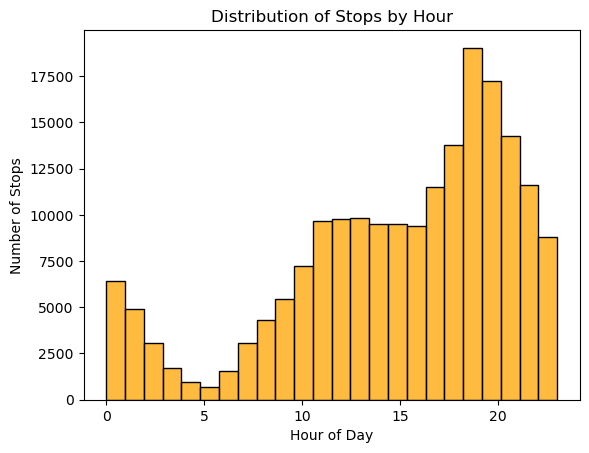

/tmp/ipykernel_3215726/4225594215.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=night_stops.index, y=night_stops.values, palette="Set2")


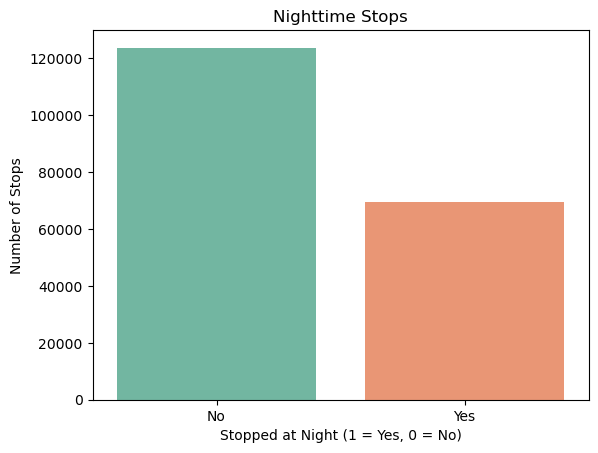

In [12]:
# Distribution of stops by time of day
df["hour"] = pd.to_datetime(df["time"]).dt.hour
sns.histplot(df["hour"], bins=24, kde=False, color="orange")
plt.title("Distribution of Stops by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Stops")
plt.show()

# Analyze nighttime stops
night_stops = df["stopped_at_night"].value_counts()
sns.barplot(x=night_stops.index, y=night_stops.values, palette="Set2")
plt.title("Nighttime Stops")
plt.xlabel("Stopped at Night (1 = Yes, 0 = No)")
plt.ylabel("Number of Stops")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()


/tmp/ipykernel_3215726/635145588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette="viridis")


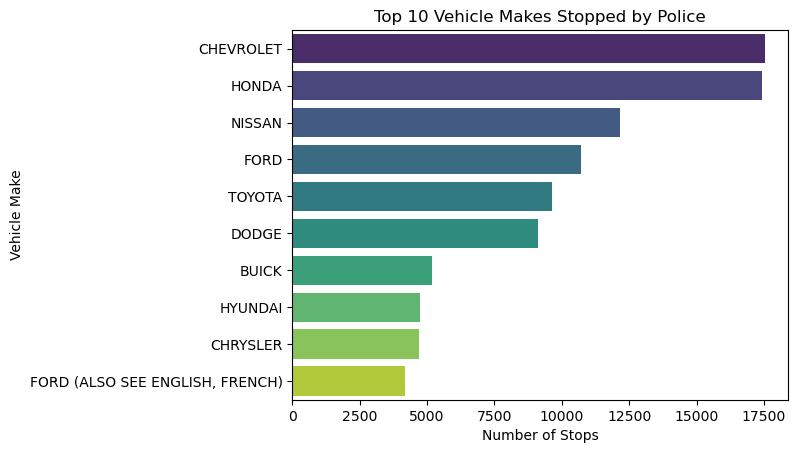

In [13]:
# Top 10 most common vehicle makes
top_makes = df["vehicle_make"].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette="viridis")
plt.title("Top 10 Vehicle Makes Stopped by Police")
plt.xlabel("Number of Stops")
plt.ylabel("Vehicle Make")
plt.show()


/tmp/ipykernel_3215726/1444027379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrests_by_color.values, y=arrests_by_color.index, palette="cubehelix")


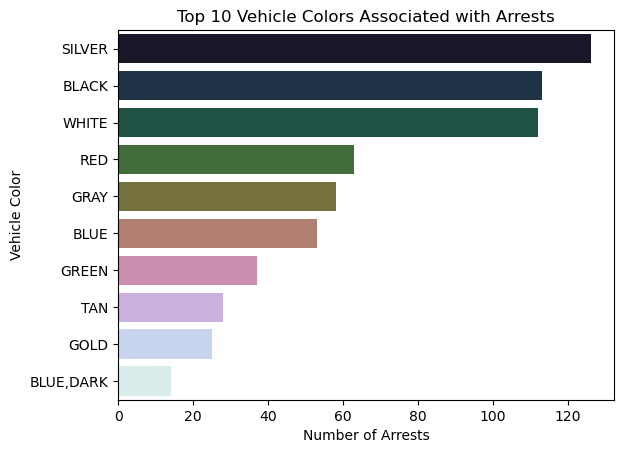

In [14]:
# Analyze vehicle colors associated with arrests
arrests_by_color = df[df["arrest_made"] == 1]["vehicle_color"].value_counts().head(10)
sns.barplot(x=arrests_by_color.values, y=arrests_by_color.index, palette="cubehelix")
plt.title("Top 10 Vehicle Colors Associated with Arrests")
plt.xlabel("Number of Arrests")
plt.ylabel("Vehicle Color")
plt.show()


Database Integration

In [15]:
# Import required libraries
import pandas as pd
import sqlite3


In [16]:
# Create database and store
db_path = "police_stops_analysis.db"  
conn = sqlite3.connect(db_path)

df.to_sql("police_stops", conn, if_exists="replace", index=False)
print(f"Dataset stored at {db_path}")


Dataset stored at police_stops_analysis.db


In [17]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

query = "SELECT * FROM police_stops LIMIT 5;"
preview = pd.read_sql(query, conn)
print("Preview of the police_stops table:")
print(preview)


Tables in the database:
           name
0  police_stops
Preview of the police_stops table:
  raw_row_number        date                 time  \
0              1  2013-05-01  2024-12-12 02:09:00   
1              2  2013-05-01  2024-12-12 03:51:00   
2              3  2013-05-01  2024-12-12 04:23:00   
3              4  2013-05-01  2024-12-12 07:57:00   
4              5  2013-05-01  2024-12-12 07:58:00   

                                         location        lat        lng  \
0      N 7TH ST & YORK ST CAMDEN NEW JERSEY 08102  39.104028 -84.512616   
1    N FRONT ST & YORK ST CAMDEN NEW JERSEY 08102  39.951751 -75.124895   
2  S 17TH ST & FEDERAL ST CAMDEN NEW JERSEY 08105  39.944575 -75.100156   
3      N 5TH ST & YORK ST CAMDEN NEW JERSEY 08102  39.953857 -75.118494   
4      N 4TH ST & ERIE ST CAMDEN NEW JERSEY 08102  39.955115 -75.119466   

   subject_age subject_race subject_sex  unit  ...   outcome vehicle_color  \
0         19.0     hispanic        male  None  ...      None 

In [18]:
# Count stops by subject race
query = """
SELECT subject_race, COUNT(*) as stop_count
FROM police_stops
GROUP BY subject_race
ORDER BY stop_count DESC;
"""
stops_by_race = pd.read_sql(query, conn)
print("Stops by Race:")
print(stops_by_race)


Stops by Race:
             subject_race  stop_count
0                   black       89979
1                hispanic       65456
2                   white       36068
3  asian/pacific islander        1478
4                   other         364
5                 unknown          49


In [19]:
# Calculate the arrest rate for each race
query = """
SELECT subject_race,
       SUM(CASE WHEN arrest_made = 1 THEN 1 ELSE 0 END) as arrests,
       COUNT(*) as total_stops,
       (SUM(CASE WHEN arrest_made = 1 THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) as arrest_rate
FROM police_stops
GROUP BY subject_race
ORDER BY arrest_rate DESC;
"""
arrest_rates = pd.read_sql(query, conn)
print("Arrest Rates by Race:")
print(arrest_rates)


Arrest Rates by Race:
             subject_race  arrests  total_stops  arrest_rate
0                   white      438        36068     0.012144
1                   black      735        89979     0.008169
2                hispanic      328        65456     0.005011
3  asian/pacific islander        7         1478     0.004736
4                 unknown        0           49     0.000000
5                   other        0          364     0.000000


In [20]:
# Count stops occurring at night
query = """
SELECT stopped_at_night, COUNT(*) as stop_count
FROM police_stops
GROUP BY stopped_at_night;
"""
night_stops = pd.read_sql(query, conn)
print("Stops During Nighttime:")
print(night_stops)


Stops During Nighttime:
   stopped_at_night  stop_count
0                 0      123752
1                 1       69642


In [21]:
# Vehicle makes with the highest number of arrests
query = """
SELECT vehicle_make,
       SUM(CASE WHEN arrest_made = 1 THEN 1 ELSE 0 END) as arrests,
       COUNT(*) as total_stops,
       (SUM(CASE WHEN arrest_made = 1 THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) as arrest_rate
FROM police_stops
WHERE vehicle_make IS NOT NULL
GROUP BY vehicle_make
ORDER BY arrests DESC
LIMIT 10;
"""
vehicle_arrests = pd.read_sql(query, conn)
print("Top Vehicle Makes Associated with Arrests:")
print(vehicle_arrests)


Top Vehicle Makes Associated with Arrests:
  vehicle_make  arrests  total_stops  arrest_rate
0    CHEVROLET      106        17526     0.006048
1         FORD       92        10729     0.008575
2        HONDA       70        17412     0.004020
3        DODGE       54         9110     0.005928
4       NISSAN       48        12177     0.003942
5       TOYOTA       38         9632     0.003945
6        BUICK       38         5194     0.007316
7      MERCURY       32         3143     0.010181
8     CHRYSLER       21         4684     0.004483
9      HYUNDAI       19         4750     0.004000


In [22]:
# Analyze stops by latitude and longitude
query = """
SELECT ROUND(lat, 3) as rounded_lat, ROUND(lng, 3) as rounded_lng, COUNT(*) as stop_count
FROM police_stops
WHERE lat IS NOT NULL AND lng IS NOT NULL
GROUP BY rounded_lat, rounded_lng
ORDER BY stop_count DESC
LIMIT 10;
"""
geo_stops = pd.read_sql(query, conn)
print("Top Locations for Police Stops (Rounded Coordinates):")
print(geo_stops)


Top Locations for Police Stops (Rounded Coordinates):
   rounded_lat  rounded_lng  stop_count
0       40.058      -74.406       26623
1       39.918      -75.114        3323
2       39.956      -75.117        3113
3       39.925      -75.107        2973
4       39.932      -75.119        2134
5       39.110      -84.538        1963
6       39.916      -75.102        1689
7       39.109      -84.518        1597
8       39.936      -75.119        1558
9       39.931      -75.102        1547


In [23]:
conn.close()


ML model training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Preprocessing
cleaned_file_path = "nj_camden_cleaned.csv"  
df = pd.read_csv(cleaned_file_path)

X = df[["subject_age", "stopped_at_night", "vehicle_year"]]
X = pd.get_dummies(X, drop_first=True)  

# Target variable: whether an arrest was made
y = df["arrest_made"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (154715, 3)
Testing set size: (38679, 3)


/tmp/ipykernel_3215726/2195514051.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cleaned_file_path)


In [26]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [27]:
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     38384
        True       0.00      0.00      0.00       295

    accuracy                           0.99     38679
   macro avg       0.50      0.50      0.50     38679
weighted avg       0.98      0.99      0.99     38679

Model Accuracy: 0.99


/usr/lib/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipykernel_3215726/954479038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


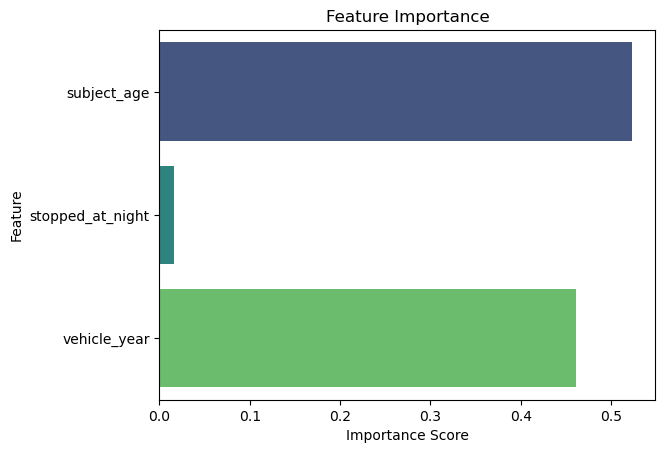

In [28]:
importances = rf_model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Summary + Findings

In [29]:
outcome_summary = df.groupby("subject_race").agg({
    "arrest_made": ["sum", "count", lambda x: x.sum() / x.count()],
    "citation_issued": ["sum", "count", lambda x: x.sum() / x.count()]
}).reset_index()

outcome_summary.columns = ["Race", "Arrests", "Total Stops", "Arrest Rate", 
                           "Citations", "Total Stops (Citations)", "Citation Rate"]


print("Outcome Summary by Race:")
print(outcome_summary)




Outcome Summary by Race:
                     Race  Arrests  Total Stops  Arrest Rate  Citations  \
0  asian/pacific islander        7         1478     0.004736        329   
1                   black      735        89979     0.008169      22088   
2                hispanic      328        65456     0.005011      16750   
3                   other        0          364     0.000000         43   
4                 unknown        0           49     0.000000         11   
5                   white      438        36068     0.012144       8121   

   Total Stops (Citations)  Citation Rate  
0                     1478       0.222598  
1                    89979       0.245480  
2                    65456       0.255897  
3                      364       0.118132  
4                       49       0.224490  
5                    36068       0.225158  


/tmp/ipykernel_3215726/1171190689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Race", y="Arrest Rate", data=outcome_summary, palette="Set3")


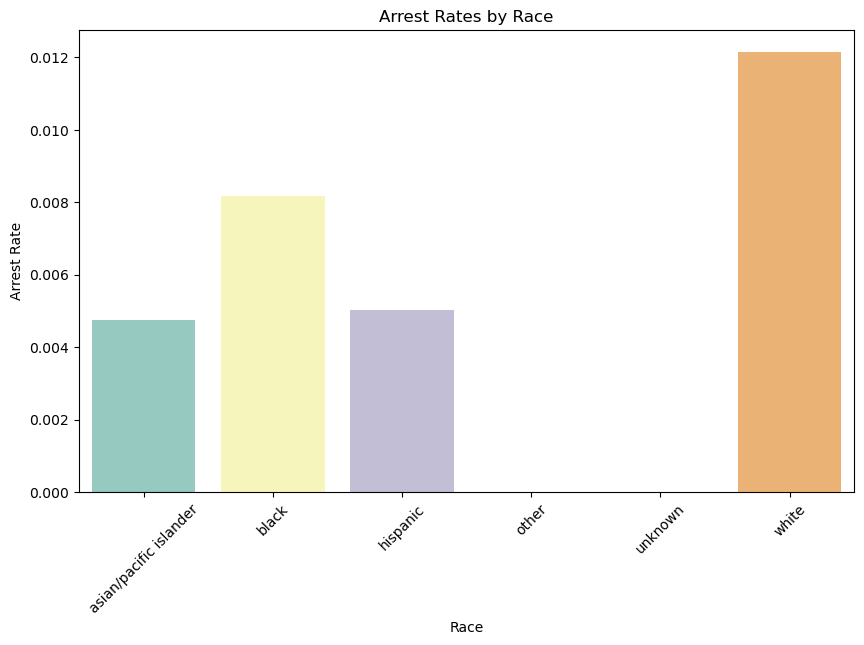

In [30]:
# Visualize arrest rates by race
plt.figure(figsize=(10, 6))
sns.barplot(x="Race", y="Arrest Rate", data=outcome_summary, palette="Set3")
plt.title("Arrest Rates by Race")
plt.xlabel("Race")
plt.ylabel("Arrest Rate")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_3215726/3643492359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Race", y="Citation Rate", data=outcome_summary, palette="coolwarm")


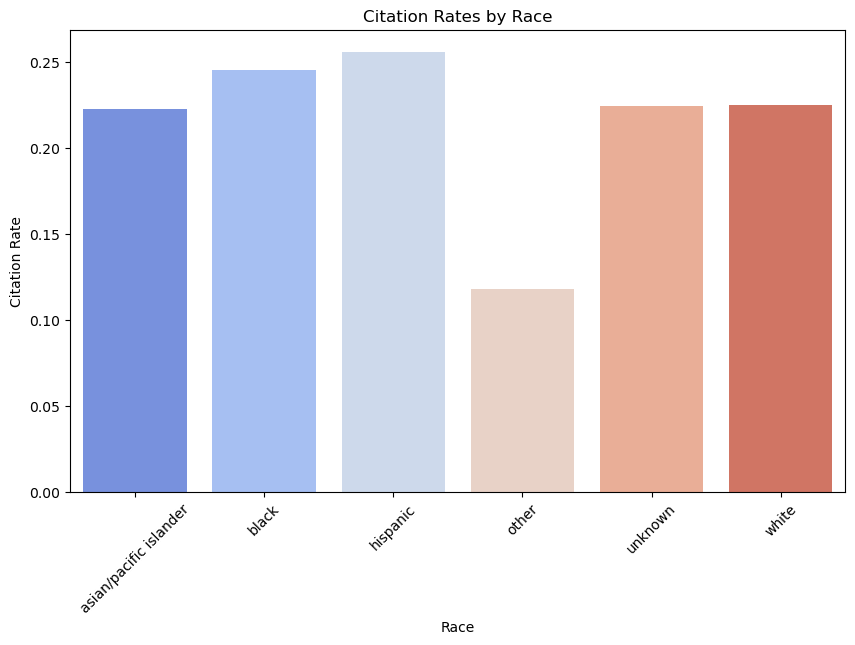

In [31]:
# Visualize citation rates by race
plt.figure(figsize=(10, 6))
sns.barplot(x="Race", y="Citation Rate", data=outcome_summary, palette="coolwarm")
plt.title("Citation Rates by Race")
plt.xlabel("Race")
plt.ylabel("Citation Rate")
plt.xticks(rotation=45)
plt.show()
